In [1]:
import numpy as np
import pandas as pd
#from chainconsumer import ChainConsumer
from scipy.stats import norm
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rc('font', size=14)

In [2]:
!ls -lht /groups/timeifler/xfang/lsstxso/chains/

total 113G
-rw-r--r-- 1 xfang timeifler 2.7G Feb  3 20:49 RomanxS4_6x2pt_modified_w0wa
-rw-r--r-- 1 xfang timeifler 2.7G Feb  3 16:00 RomanxSO_6x2pt_modified_w0wa
-rw-r--r-- 1 xfang timeifler 2.7G Feb  3 06:06 RomanWidexS4_6x2pt_modified_w0wa
-rw-r--r-- 1 xfang timeifler 2.7G Feb  3 01:12 RomanxS4_3x2pt_modified_w0wa
-rw-r--r-- 1 xfang timeifler 2.7G Feb  1 15:22 RomanWidexS4_3x2pt_modified_w0wa
-rw-r--r-- 1 xfang timeifler 2.9G Jan 31 15:13 RomanxS4_1sample_10x2pt_modified
-rw-r--r-- 1 xfang timeifler 2.7G Jan 31 14:16 RomanxSO_3x2pt_modified_w0wa
-rw-r--r-- 1 xfang timeifler 2.5G Jan 30 23:48 RomanWidexS4_1sample_10x2pt_modified
-rw-r--r-- 1 xfang timeifler 3.2G Jan 30 14:12 RomanxSO_10x2pt_modified_w0wa
-rw-r--r-- 1 xfang timeifler 3.2G Jan 29 15:24 RomanWidexS4_10x2pt_modified_w0wa
-rw-r--r-- 1 xfang timeifler 3.2G Jan 29 14:21 RomanxS4_10x2pt_modified_w0wa
-rw-r--r-- 1 xfang timeifler 3.1G Jan 28 23:54 LSSTxSO_10x2pt_model_1_modified_shear3000_nocalib
-rw-r--r-- 1 xfang timeifler 

In [3]:
!head -n3 /groups/timeifler/xfang/lsstxso/chains/RomanxSO_10x2pt_modified_w0wa

# omega_m    sigma_8    n_s    w0    wa    omega_b    h0    bias_0    bias_1    bias_2    bias_3    bias_4    bias_5    bias_6    bias_7    bias_8    bias_9    A_ia    eta_ia    gas_0    gas_1    gas_2    gas_3    gas_7    gas_8    gas_9    gas_10 log_like
#blind=False
0.3073779015794908  0.8398026764902989  0.9690879373861339  -1.0722897803311693  -0.05295399017402907  0.04853167031547153  0.6624873771229731  1.3738526457146731  1.5944647989637202  1.7103596030393484  1.3687080105127243  1.728499400337907  1.7899113427490083  2.021328856264406  1.9977694749555615  2.3606814872288564  2.127306962091459  0.646952424356962  -0.04805799005783837  1.1626518296928579  0.5958082366810595  13.91514346692784  1.0461686958956373  6.4956582589006135  0.7492616684817419  -0.07417246572189487  0.06046333652631794 -6.108428e+03


In [4]:
!wc -l  /groups/timeifler/xfang/lsstxso/chains/RomanxSO_10x2pt_modified_w0wa

6000962 /groups/timeifler/xfang/lsstxso/chains/RomanxSO_10x2pt_modified_w0wa


In [5]:
file_chain = '/groups/timeifler/xfang/lsstxso/chains/'
chain_name = 'RomanxSO_10x2pt_modified_w0wa'

col_names = ['Omega_m', 'sigma_8', 'n_s', 'w0', 'wa', 'Omega_b', 'h0'] + \
            [f'bias_{i}' for i in range(10)] + ['A_ia', 'eta_ia'] + [f'gas_{i}' for i in [0, 1, 2, 3, 7, 8, 9, 10] ] + ['log_like']

df = pd.read_csv(file_chain+chain_name, skiprows=range(0, 4000000), delim_whitespace=True, names=col_names)

In [6]:
df

,Omega_m,sigma_8,n_s,w0,wa,Omega_b,h0,bias_0,bias_1,bias_2,...,eta_ia,gas_0,gas_1,gas_2,gas_3,gas_7,gas_8,gas_9,gas_10,log_like
0,0.314787,0.833873,0.948559,-1.023604,0.095703,0.049436,0.683051,1.326418,1.405604,1.490998,...,-0.283232,1.167057,0.700010,13.890900,0.886954,6.488960,0.761293,0.110462,-0.063353,-11.541440
1,0.306204,0.841155,0.958406,-1.192016,0.713727,0.047009,0.688669,1.281901,1.395604,1.485519,...,0.054138,1.172497,0.616302,14.014778,0.998078,6.503894,0.703405,-0.044816,0.059294,-11.261280
2,0.318259,0.826952,0.946827,-0.935100,-0.291818,0.053137,0.702004,1.309768,1.410758,1.503995,...,-0.199188,1.174478,0.465968,14.504107,1.189083,6.473624,0.703681,-0.117884,0.258559,-11.095940
3,0.315898,0.831548,0.963052,-0.919052,-0.209499,0.047680,0.675295,1.285277,1.378441,1.482182,...,-0.087666,1.168163,0.596815,14.027577,1.018754,6.518482,0.703921,0.080494,-0.067511,-5.156603
4,0.322810,0.828744,0.944145,-0.995615,0.088331,0.047702,0.669054,1.306464,1.400908,1.514647,...,-0.013336,1.163274,0.798483,13.763850,0.847679,6.533165,0.754799,0.085717,-0.086812,-9.898305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000957,0.320010,0.825605,0.962993,-1.034971,0.101791,0.051120,0.668466,1.306451,1.422582,1.511254,...,-0.020618,1.172168,0.869338,13.743687,0.836666,6.497688,0.781627,0.093504,-0.044994,-12.402990
2000958,0.307943,0.837392,0.966409,-1.105597,0.319376,0.053357,0.701213,1.294366,1.410044,1.511793,...,-0.338331,1.173066,0.470882,14.223417,1.009082,6.435086,0.744697,-0.099421,0.092678,-11.042720
2000959,0.323133,0.822876,0.968893,-0.856254,-0.472971,0.049366,0.656724,1.277435,1.375987,1.499312,...,-0.405146,1.165354,0.827921,13.854119,0.893322,6.544575,0.748603,0.138580,-0.080963,-13.656690
2000960,0.313004,0.833481,0.962590,-0.976203,-0.133106,0.041465,0.653559,1.296486,1.399597,1.491972,...,0.095700,1.169626,0.649923,13.896515,1.121299,6.589319,0.721765,0.013579,-0.000504,-8.538607


In [7]:
def display_1D_hist(par, n=3):
    _h = plt.hist(df[par], bins=40)
    (mu, sigma) = norm.fit(df[par])

    plt.axvline(mu, color='r')

    plt.axvline(mu+n*sigma, color='orange')
    plt.axvline(mu-n*sigma, color='orange')
    plt.xlabel(par)

    print(f'mean {par}:', f'{mu:.3f}')
    print('+- 3 sigma range:', f'{mu-n*sigma:.3f}', '~', f'{mu+n*sigma:.3f}')

mean Omega_m: 0.316
+- 3 sigma range: 0.292 ~ 0.340


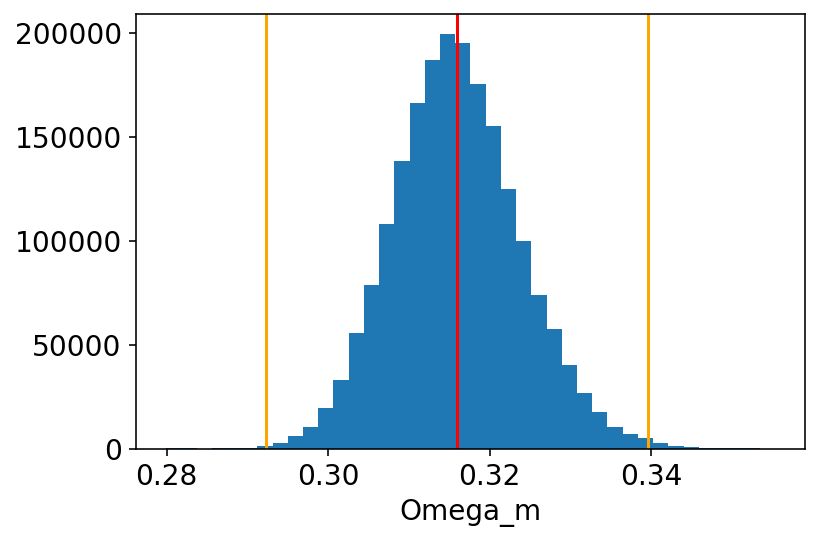

In [8]:
display_1D_hist(par='Omega_m', n=3)

mean sigma_8: 0.831
+- 3 sigma range: 0.811 ~ 0.852


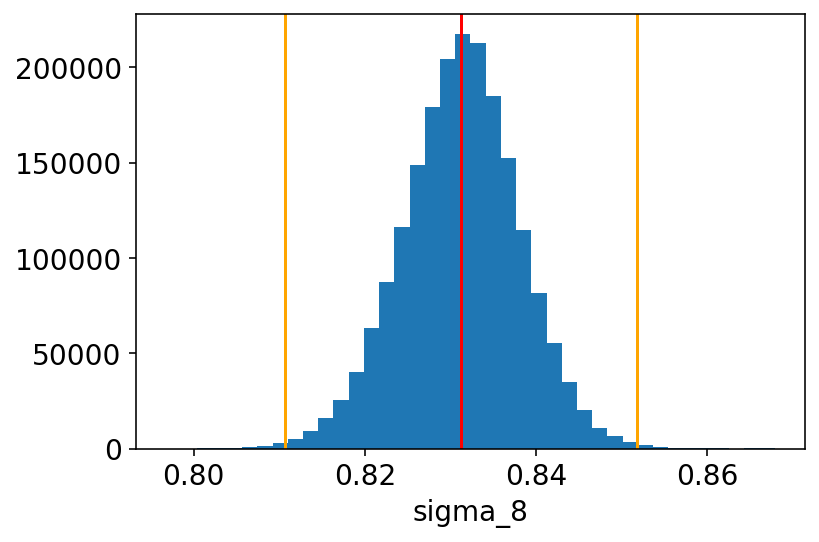

In [9]:
display_1D_hist('sigma_8', n=3)

mean n_s: 0.961
+- 3 sigma range: 0.906 ~ 1.016


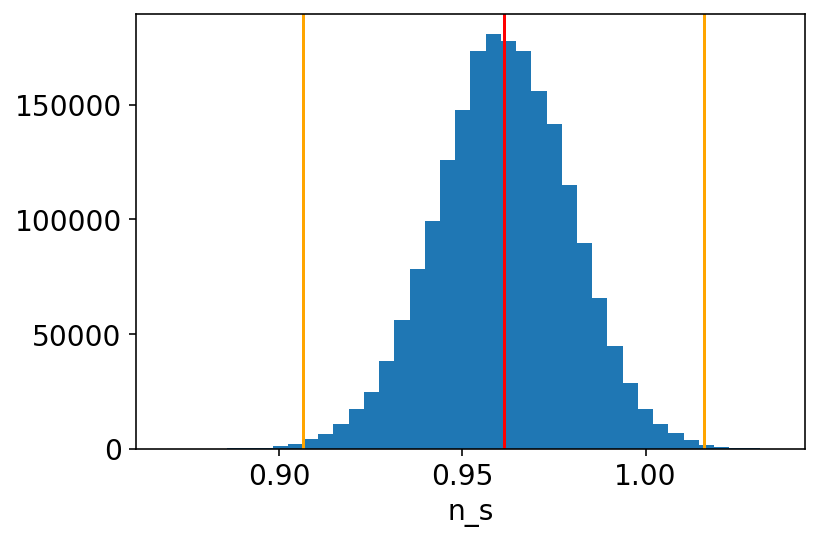

In [10]:
display_1D_hist('n_s', n=3)

mean w0: -0.992
+- 3 sigma range: -1.275 ~ -0.708


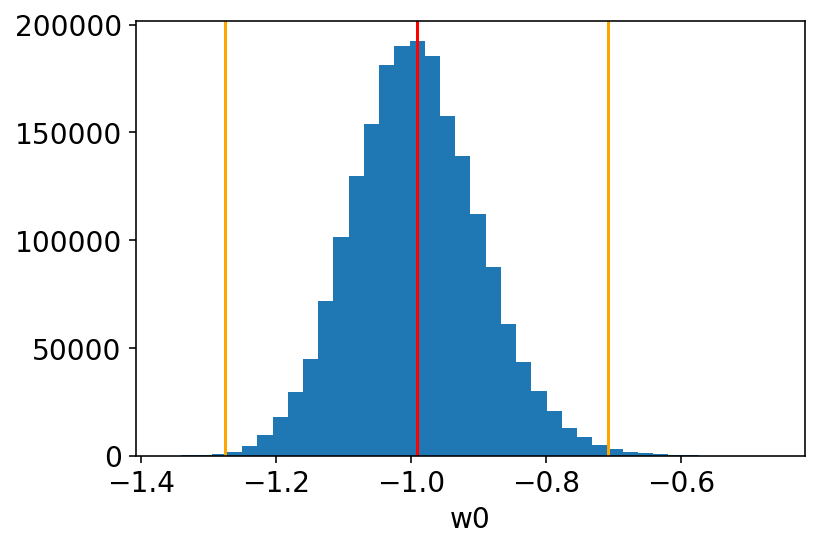

In [11]:
display_1D_hist('w0', n=3)

In [12]:
def get_n_sigma_range(par, n=3):
    (mu, sigma) = norm.fit(df[par])
    return mu, sigma, mu-n*sigma, mu+n*sigma

In [13]:
summary = pd.DataFrame(columns=['mean', 'sigma', 'low', 'high'])

par_names = ['Omega_m', 'sigma_8', 'n_s', 'w0', 'wa', 'Omega_b', 'h0'] + \
            ['A_ia', 'eta_ia'] + [f'gas_{i}' for i in [0, 1, 2, 3, 7, 8, 9, 10] ]

for par in par_names:
    mu, sigma, low, high = get_n_sigma_range(par, n=3)
    summary.loc[par] = {'mean': mu, 'sigma': sigma, 'low': low, 'high': high}

In [14]:
summary

,mean,sigma,low,high
Omega_m,0.315975,0.007890,0.292304,0.339645
sigma_8,0.831229,0.006842,0.810703,0.851756
n_s,0.961270,0.018267,0.906469,1.016072
w0,-0.991678,0.094447,-1.275020,-0.708336
wa,-0.022786,0.326175,-1.001310,0.955737
Omega_b,0.048489,0.003502,0.037982,0.058996
h0,0.673549,0.028843,0.587021,0.760077
A_ia,0.498219,0.033918,0.396465,0.599972
eta_ia,-0.029277,0.213353,-0.669334,0.610781
gas_0,1.170026,0.003732,1.158831,1.181221


In [15]:
summary.to_csv(f'{chain_name}_1Dsummary.csv', index=True)